In [7]:
!pip install nltk 

In [30]:
!pip install wordcloud

     |████████████████████████████████| 158 kB 82 kB/s eta 0:00:01


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
import warnings
warnings.filterwarnings("ignore")

In [2]:
from nltk.corpus import stopwords 
from nltk.stem.lancaster import LancasterStemmer  
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
nltk.download('stopwords')
set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nimeshroy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [3]:
train=pd.read_csv("train.csv")
train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [23]:
train.isna().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [5]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train.isnull().count()

id                  159571
comment_text        159571
malignant           159571
highly_malignant    159571
rude                159571
threat              159571
abuse               159571
loathe              159571
dtype: int64

In [7]:
train.malignant.value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [8]:
train['comment_text'][3]

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

In [9]:
train_count=train.iloc[:,2:].sum()
train_count

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

Text(0.5, 0, 'Type ')

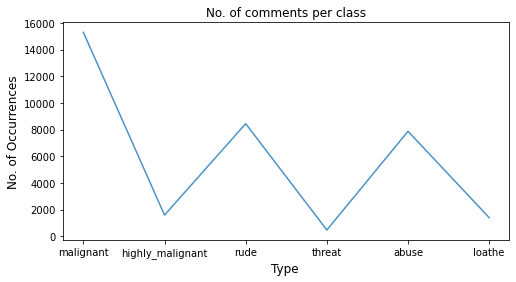

In [10]:
plt.figure(figsize=(8,4))
ax = sns.lineplot(train_count.index, train_count.values, alpha=0.8)
plt.title("No. of comments per class")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

<AxesSubplot:xlabel='malignant', ylabel='Density'>

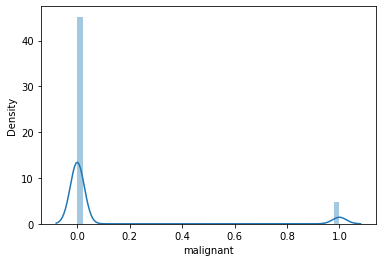

In [12]:
sns.distplot(train['malignant'])

<AxesSubplot:xlabel='highly_malignant', ylabel='Density'>

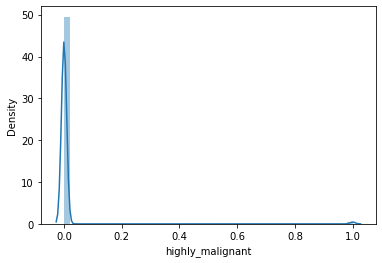

In [13]:
sns.distplot(train['highly_malignant'])

<AxesSubplot:xlabel='rude', ylabel='Density'>

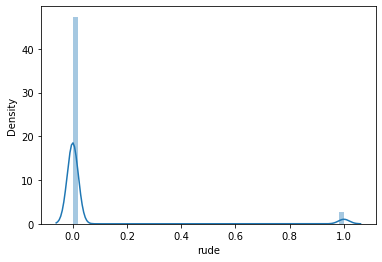

In [14]:
sns.distplot(train['rude'])

<AxesSubplot:xlabel='threat', ylabel='Density'>

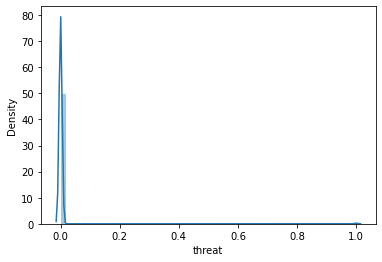

In [15]:
sns.distplot(train['threat'])

<AxesSubplot:xlabel='abuse', ylabel='Density'>

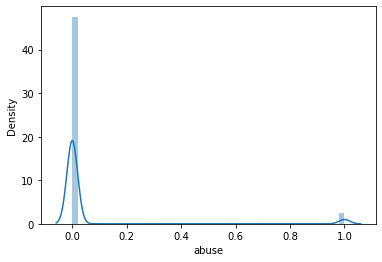

In [16]:
sns.distplot(train['abuse'])

<AxesSubplot:xlabel='loathe', ylabel='Density'>

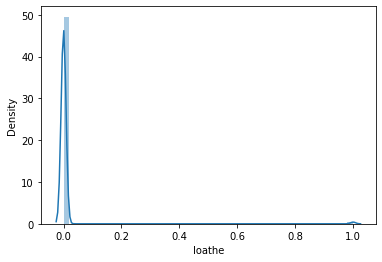

In [17]:
sns.distplot(train['loathe'])

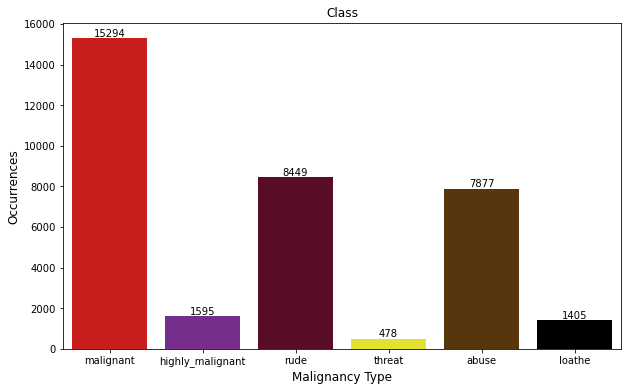

In [44]:
colors_list = ["red", "purple","maroon","yellow", "brown","black", "blue"]

palette= sns.xkcd_palette(colors_list)

x=train.iloc[:,2:].sum()

plt.figure(figsize=(10,6))
# x.index has all the toxicity labels and x.values has their respective count
ax= sns.barplot(x.index, x.values,palette=palette)
plt.title("Class")
plt.xlabel('Malignancy Type', fontsize = 12)
plt.ylabel('Occurrences', fontsize=12)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')


<AxesSubplot:title={'center':'Correlation of features & targets'}>

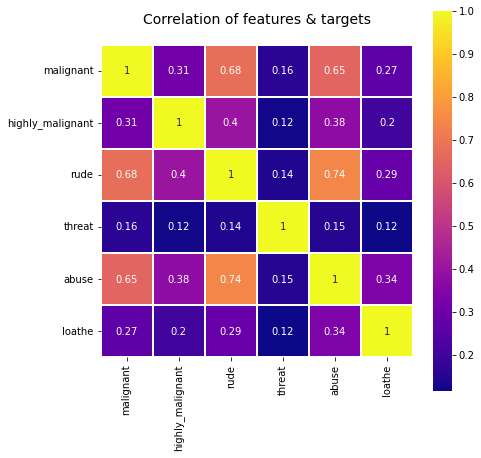

In [53]:
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

In [50]:
num_rows = len(train)
print(num_rows)

159571


In [51]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

In [27]:
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

In [28]:
remove_n = lambda x: re.sub("\n", " ", x)

In [29]:
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

In [30]:
train['comment_text'] = train['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
train['comment_text'][3]

'  more i can t make any real suggestions on improvement   i wondered if the section statistics should be later on  or a subsection of   types of accidents     i think the references may need tidying so that they are all in the exact same format ie date format etc  i can do that later on  if no one else does first   if you have any preferences for formatting style on references or want to do it yourself please let me know   there appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up  it s listed in the relevant form eg wikipedia good article nominations transport   '

In [31]:
train_mal = train.loc[:,['id','comment_text','malignant']]

train_high = train.loc[:,['id','comment_text','highly_malignant']]

train_rud = train.loc[:,['id','comment_text','rude']]

train_thr = train.loc[:,['id','comment_text','threat']]

train_abs = train.loc[:,['id','comment_text','abuse']]

train_loa = train.loc[:,['id','comment_text','loathe']]

In [32]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

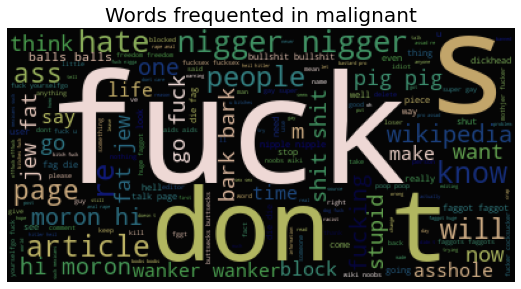

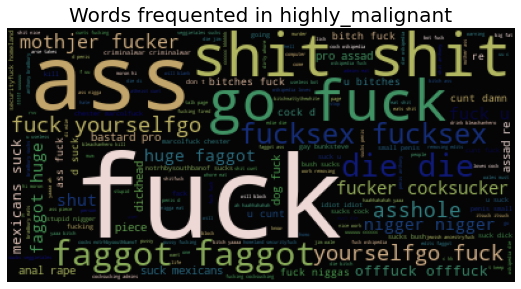

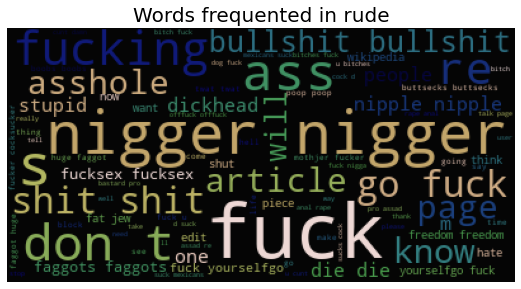

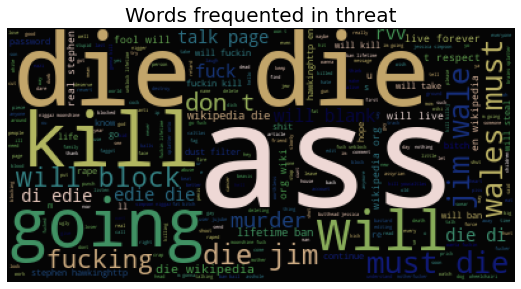

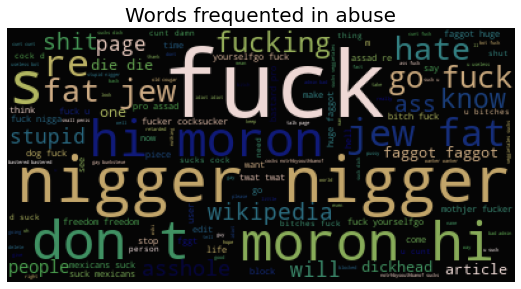

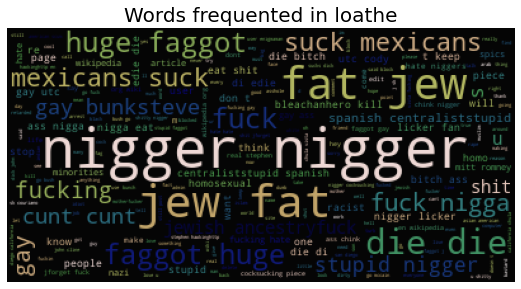

In [33]:
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

wordcloud(train_mal,'malignant')
wordcloud(train_high,'highly_malignant')    
wordcloud(train_rud,'rude')
wordcloud(train_thr,'threat')
wordcloud(train_abs,'abuse')
wordcloud(train_loa,'loathe')

In [34]:
train_mal.head()

train_mal_1 = train_mal[train_mal['malignant'] == 1].iloc[0:5000,:]
train_mal_1.shape

train_mal_0 = train_mal[train_mal['malignant'] == 0].iloc[0:5000,:]

train_mal_done = pd.concat([train_mal_1, train_mal_0], axis=0)
train_mal_done.shape


(10000, 3)

In [35]:
train_high[train_high['highly_malignant'] == 1].count()

train_high_1 = train_high[train_high['highly_malignant'] == 1].iloc[0:1595,:]
train_high_0 = train_high[train_high['highly_malignant'] == 0].iloc[0:1595,:]
train_high_done = pd.concat([train_high_1, train_high_0], axis=0)
train_high_done.shape

(3190, 3)

In [36]:
train_rud[train_rud['rude'] == 1].count()

train_rud_1 = train_rud[train_rud['rude'] == 1].iloc[0:5000,:]
train_rud_0 = train_rud[train_rud['rude'] == 0].iloc[0:5000,:]
train_rud_done = pd.concat([train_rud_1, train_rud_0], axis=0)
train_rud_done.shape

(10000, 3)

In [37]:
train_thr[train_thr['threat'] == 1].count()

train_thr_1 = train_thr[train_thr['threat'] == 1].iloc[0:478,:]

train_thr_0 = train_thr[train_thr['threat'] == 0].iloc[0:1912,:]  
train_thr_done = pd.concat([train_thr_1, train_thr_0], axis=0)
train_thr_done.shape

(2390, 3)

In [38]:
train_abs[train_abs['abuse'] == 1].count()

train_abs_1 = train_abs[train_abs['abuse'] == 1].iloc[0:5000,:]
train_abs_0 = train_abs[train_abs['abuse'] == 0].iloc[0:5000,:]
train_abs_done = pd.concat([train_abs_1, train_abs_0], axis=0)
train_abs_done.shape

(10000, 3)

In [39]:
train_loa[train_loa['loathe'] == 1].count()

train_loa_1 = train_loa[train_loa['loathe'] == 1].iloc[0:1405,:] # 20%
train_loa_0 = train_loa[train_loa['loathe'] == 0].iloc[0:5620,:] # 80%
train_loa_done = pd.concat([train_loa_1, train_loa_0], axis=0)
train_loa_done.shape

(7025, 3)

In [40]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [75]:
def cv_tf_train_test(df_done,label,vectorizer,ngram):
     X = df_done.comment_text
     y = df_done[label]
     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
     cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
     X_train_cv1 = cv1.fit_transform(X_train) 
     X_test_cv1  = cv1.transform(X_test)  
     lr = LogisticRegression()
     lr.fit(X_train_cv1, y_train)
     print('lr done')
     knn = KNeighborsClassifier(n_neighbors=5)
     knn.fit(X_train_cv1, y_train) 
     print('knn done')   
     bnb = BernoulliNB()
     bnb.fit(X_train_cv1, y_train)
     print('bnb done')
     mnb = MultinomialNB()
     mnb.fit(X_train_cv1, y_train)
     print('mnb done')
     svm_model = LinearSVC()
     svm_model.fit(X_train_cv1, y_train)
     print('svm done')
     randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
     randomforest.fit(X_train_cv1, y_train)
     print('rdf done') 
     f1_score_data = {'F1 Score':[f1_score(lr.predict(X_test_cv1), y_test), f1_score(knn.predict(X_test_cv1), y_test), 
                                f1_score(bnb.predict(X_test_cv1), y_test), f1_score(mnb.predict(X_test_cv1), y_test),
                                f1_score(svm_model.predict(X_test_cv1), y_test), f1_score(randomforest.predict(X_test_cv1), y_test)]} 
     df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])  

     return df_f1


In [78]:
import time

t0 = time.time()

df_mal_cv = cv_tf_train_test(train_mal_done, 'malignant', TfidfVectorizer, (1,1))
df_mal_cv.rename(columns={'F1 Score': 'F1 Score(malignant)'}, inplace=True)
t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_mal_cv


lr done
knn done
bnb done
mnb done
svm done
rdf done
Time taken: 9.020282745361328 seconds


,F1 Score(malignant)
Log Regression,0.860941
KNN,0.170616
BernoulliNB,0.776521
MultinomialNB,0.874958
SVM,0.876510
Random Forest,0.835621


In [80]:
t0 = time.time()

df_high_cv = cv_tf_train_test(train_high_done, 'highly_malignant', TfidfVectorizer, (1,1))
df_high_cv.rename(columns={'F1 Score': 'F1 Score(highly_malignant)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)
df_high_cv

lr done
knn done
bnb done
mnb done
svm done
rdf done
Time taken: 1.586251974105835 seconds


,F1 Score(highly_malignant)
Log Regression,0.927879
KNN,0.837809
BernoulliNB,0.803707
MultinomialNB,0.936170
SVM,0.926004
Random Forest,0.927660


In [81]:
t0 = time.time()

df_rud_cv = cv_tf_train_test(train_rud_done, 'rude', TfidfVectorizer, (1,1))
df_rud_cv.rename(columns={'F1 Score': 'F1 Score(rude)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_rud_cv

lr done
knn done
bnb done
mnb done
svm done
rdf done
Time taken: 8.331427097320557 seconds


,F1 Score(rude)
Log Regression,0.908655
KNN,0.436332
BernoulliNB,0.787830
MultinomialNB,0.901399
SVM,0.921378
Random Forest,0.907370


In [82]:
t0 = time.time()

df_thr_cv = cv_tf_train_test(train_thr_done, 'threat', TfidfVectorizer, (1,1))
df_thr_cv.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_thr_cv

lr done
knn done
bnb done
mnb done
svm done
rdf done
Time taken: 1.1539697647094727 seconds


,F1 Score(threat)
Log Regression,0.628821
KNN,0.586207
BernoulliNB,0.311828
MultinomialNB,0.504762
SVM,0.786765
Random Forest,0.800000


In [83]:
t0 = time.time()

df_abs_cv = cv_tf_train_test(train_abs_done, 'abuse', TfidfVectorizer, (1,1))
df_abs_cv.rename(columns={'F1 Score': 'F1 Score(abuse)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_abs_cv

lr done
knn done
bnb done
mnb done
svm done
rdf done
Time taken: 9.690858125686646 seconds


,F1 Score(abuse)
Log Regression,0.896599
KNN,0.244898
BernoulliNB,0.783762
MultinomialNB,0.897411
SVM,0.902619
Random Forest,0.882616


In [84]:
t0 = time.time()

df_loa_cv = cv_tf_train_test(train_loa_done, 'loathe', TfidfVectorizer, (1,1))
df_loa_cv.rename(columns={'F1 Score': 'F1 Score(loathe)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_loa_cv

lr done
knn done
bnb done
mnb done
svm done
rdf done
Time taken: 4.820180177688599 seconds


,F1 Score(loathe)
Log Regression,0.699029
KNN,0.197980
BernoulliNB,0.549206
MultinomialNB,0.485857
SVM,0.797516
Random Forest,0.769821


In [87]:
f1_all = pd.concat([df_mal_cv, df_high_cv, df_rud_cv, df_abs_cv, df_thr_cv, df_loa_cv], axis=1)
f1_all

,F1 Score(malignant),F1 Score(highly_malignant),F1 Score(rude),F1 Score(abuse),F1 Score(threat),F1 Score(loathe)
Log Regression,0.860941,0.927879,0.908655,0.896599,0.628821,0.699029
KNN,0.170616,0.837809,0.436332,0.244898,0.586207,0.197980
BernoulliNB,0.776521,0.803707,0.787830,0.783762,0.311828,0.549206
MultinomialNB,0.874958,0.936170,0.901399,0.897411,0.504762,0.485857
SVM,0.876510,0.926004,0.921378,0.902619,0.786765,0.797516
Random Forest,0.835621,0.927660,0.907370,0.882616,0.800000,0.769821


In [88]:
f1_all_trp = f1_all.transpose()
f1_all_trp

,Log Regression,KNN,BernoulliNB,MultinomialNB,SVM,Random Forest
F1 Score(malignant),0.860941,0.170616,0.776521,0.874958,0.876510,0.835621
F1 Score(highly_malignant),0.927879,0.837809,0.803707,0.936170,0.926004,0.927660
F1 Score(rude),0.908655,0.436332,0.787830,0.901399,0.921378,0.907370
F1 Score(abuse),0.896599,0.244898,0.783762,0.897411,0.902619,0.882616
F1 Score(threat),0.628821,0.586207,0.311828,0.504762,0.786765,0.800000
F1 Score(loathe),0.699029,0.197980,0.549206,0.485857,0.797516,0.769821


In [89]:
train_mal_done.head()

,id,comment_text,malignant
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1
12,0005c987bdfc9d4b,hey what is it talk what is it a...,1
16,0007e25b2121310b,bye don t look come or think of comming ba...,1
42,001810bf8c45bf5f,you are gay or antisemmitian archangel whit...,1
43,00190820581d90ce,fuck your filthy mother in the ass dry,1


In [90]:
X = train_mal_done.comment_text
y = train_mal_done['malignant']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)  
X_test_fit = tfv.transform(X_test)  

In [92]:
randomforest = RandomForestClassifier(n_estimators=100, random_state=42)

In [93]:
randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)

array([0, 1, 1, ..., 1, 1, 1])

In [96]:
comment1 = ['You piece of shit']
comment2 = ['What is up garden apple doing']

comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]

array([1.])

In [97]:
comment2_vect = tfv.transform(comment2)
randomforest.predict_proba(comment2_vect)[:,1]

array([0.15430722])

In [98]:
import pickle

def pickle_model(df, label):
    
    X = df.comment_text
    y = df[label]

    # Initiate a Tfidf vectorizer
    tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
    
    # Convert the X data into a document term matrix dataframe
    X_vect = tfv.fit_transform(X)  
    
    # saves the column labels (ie. the vocabulary)
    # wb means Writing to the file in Binary mode, written in byte objects
    with open(r"{}.pkl".format(label + '_vect'), "wb") as f:   
        pickle.dump(tfv, f)   
        
    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_vect, y)

    # Create a new pickle file based on random forest
    with open(r"{}.pkl".format(label + '_model'), "wb") as f:  
        pickle.dump(randomforest, f)

datalist = [train_mal_done, train_high_done, train_rud_done, train_abs_done, train_thr_done, train_loa_done]
label = ['malignant', 'highly_malignant', 'rude', 'abuse', 'threat', 'loathe']

for i,j in zip(datalist,label):
    pickle_model(i, j)

